<a href="https://colab.research.google.com/github/BaidyaSubhadip/Time-Series-Analysis/blob/main/ARIMA_model_AirPassenger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
data = pd.read_csv('AirPassengers.csv',index_col='Month',parse_dates=True)


In [26]:
data.shape

(144, 1)

In [10]:
data.head(10)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [11]:
data.tail(10)

,#Passengers
Month,
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390


In [13]:
result_m = seasonal_decompose(data['#Passengers'], model='multiplicative')

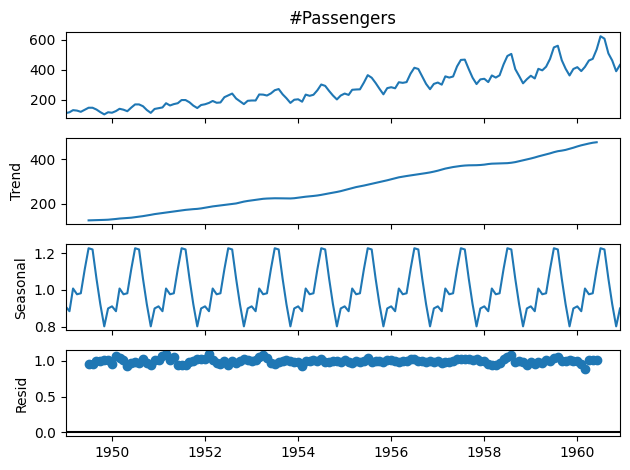

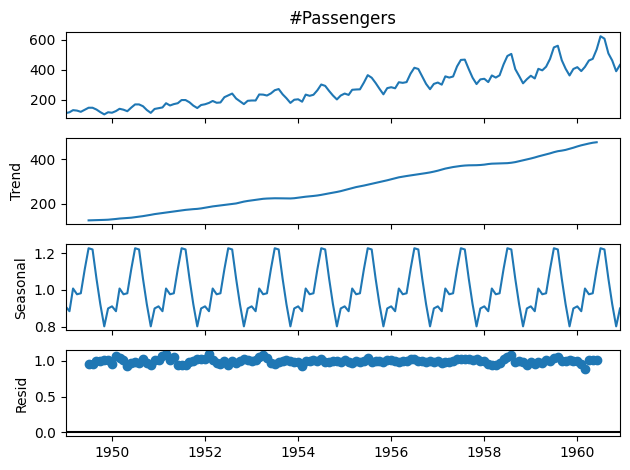

In [15]:
result_m.plot()

In [16]:
result_a = seasonal_decompose(data['#Passengers'], model='additive')

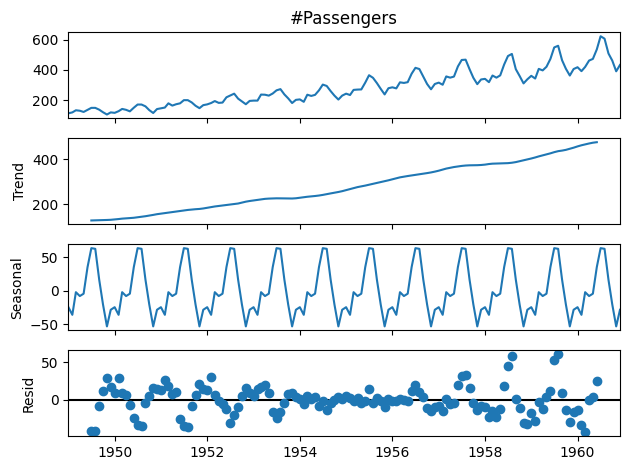

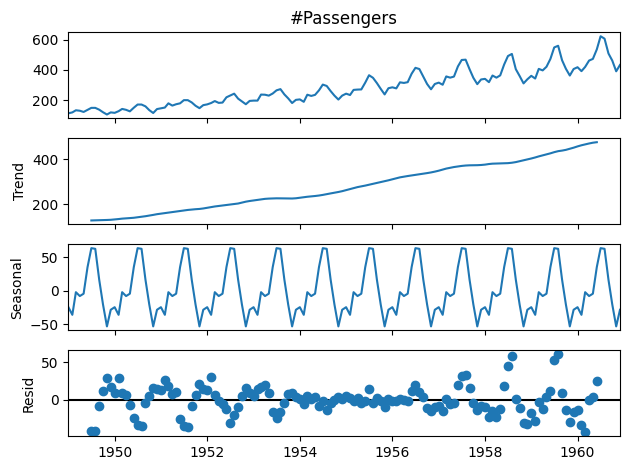

In [17]:
result_a.plot()

In [18]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.3 MB/s eta 0:00:00


In [19]:
from pmdarima import auto_arima

In [21]:
fit = auto_arima(data['#Passengers'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.42 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.18 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.29 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.45 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.85 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.96 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.62 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=1.28 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.81 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.49 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.19 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=2.80 sec
 ARIMA(0,1,1)(1,1,1)[12]     

In [22]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Fri, 05 Jul 2024   AIC                           1019.178
Time:                                     12:33:07   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

So from the summary we can see that the best ARIMA model is of order(0,1,1)

In [23]:
#spliting dataset
train = data.iloc[:len(data)-12]
test = data.iloc[len(data)-12:]

In [24]:
train.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [25]:
train.shape

(132, 1)

In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [28]:
model = SARIMAX(train['#Passengers'],
                order = (0, 1, 1),
                seasonal_order =(2, 1, 1, 12))

result = model.fit()
result.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -443.013
Date:                            Fri, 05 Jul 2024   AIC                            896.027
Time:                                    12:53:33   BIC                            909.922
Sample:                                01-01-1949   HQIC                           901.669
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2982      0.076     -3.934      0.000      -0.447      -0.150
ar.S.L12       0.7105      0.237      2.998      0.003       0.246       1.175
ar.S.L24       0.2886      0.100      2.885      0.004       0.093       0.485
ma.S.L12      -0.9800      2.262     -0.433      0.665      -5.413       3.453
sigma2        88.2971    179.432      0.492      0.623    -263.384     439.978
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.85   Prob(JB):                         1.00
Heteroskedasticity (H):               1.62   Skew:                            -0.00
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

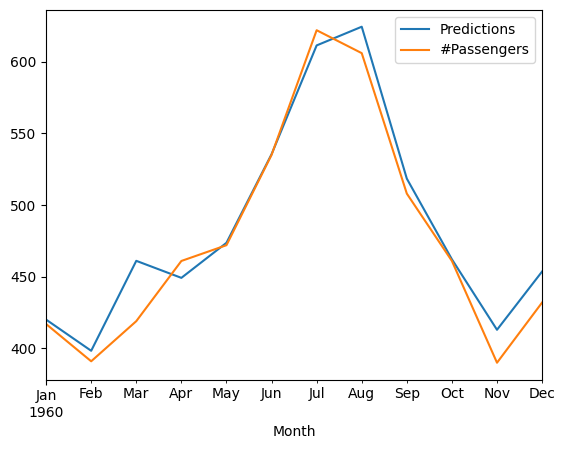

In [29]:
start = len(train)
end = len(train) + len(test) - 1
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")

predictions.plot(legend = True)
test['#Passengers'].plot(legend = True)

In [31]:
from statsmodels.tools.eval_measures import rmse

rmse(test["#Passengers"], predictions)

17.167115199421534

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

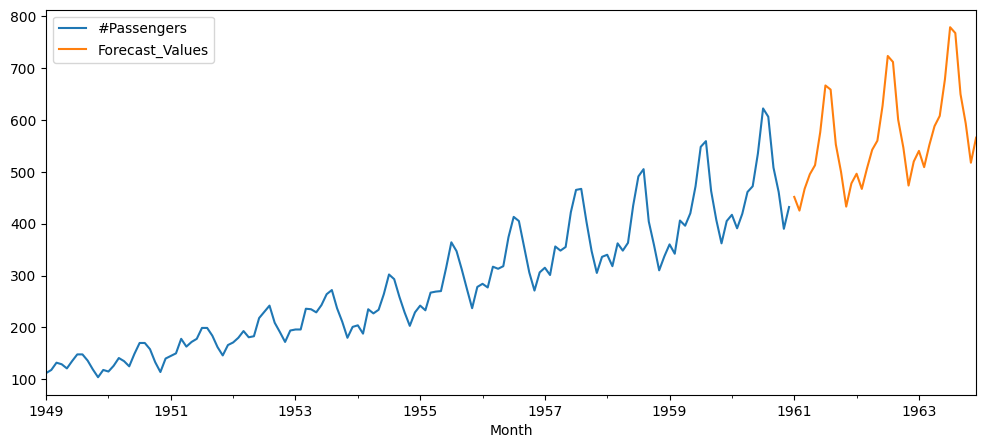

In [32]:
model = model = SARIMAX(data['#Passengers'],
                        order = (0, 1, 1),
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()


forecast = result.predict(start = len(data),
                          end = (len(data)-1) + 3 * 12,
                          typ = 'levels').rename('Forecast_Values')


data['#Passengers'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)